**START**

**Module : Time Series in Pandas**

*Time series merupakan kumpulan dataset yang indexnya berupa waktu. Data seperti ini umum dijumpai pada proses yang melibatkan suatu event. Pada bagian ini kamu akan mempelajari dataset dengan index waktu ini atau dikenal dengan time series.* 

**Pendahuluan**

*Aku mengklik link dari Andra dan kembali menelusuri isi materinya:*

*Ketika berurusan dengan big data, biasanya akan selalu terdapat entitas waktu kapan suatu event itu terjadi, waktu ini digunakan untuk mengenali event itu terjadi pada suatu frame tertentu dan dapat dijadikan index yang membuat setiap event menjadi unique.*

***Basic format datetime** menurut ISO 8601 yaitu **YYYY-mm-dd HH:MM:SS.***

**Load Dataset as Time Series**

*Terkadang Pandas salah mengenali object datetime menjadi object string dan pandas menjadi tidak bisa memanfaatkan full benefit dari time index.*

***Basic format datetime** menurut ISO 8601: **YYYY-mm-dd HH:MM:SS.***

 

Terdapat beberapa cara untuk mengubah kolom waktu menjadi format yang benar as datetime object di Pandas. 

1. **read_csv**, terdapat keyword argument 'parse_dates', yang jika di set True dan set index untuk kolom waktu tersebut maka kolom datetime tersebut akan transform as datetime Pandas dan menjadi index.

In [1]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv', parse_dates=True, index_col='timestamp')

# Cetak 5 data teratas
print(gaq.head())

# Cetak info dari dataframe gaq
print('info')
print(gaq.info())

                                                  location       city country  \
timestamp                                                                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO    LINCOLN      US   
2020-04-07 20:00:00+00:00                  Oxford St Ebbes     Oxford      GB   
2020-04-07 19:00:00+00:00                 BROADWAY (South)  St. Louis      US   
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN   
2020-04-07 20:00:00+00:00                        Manglerud       Oslo      NO   

                          pollutant  value   unit source_name   latitude  \
timestamp                                                                  
2017-01-18 16:00:00+00:00      pm10   7.00  µg/m³      AirNow  35.488400   
2020-04-07 20:00:00+00:00       no2  30.00  µg/m³       DEFRA  51.744804   
2020-04-07 19:00:00+00:00      pm25   6.10  µg/m³      AirNow  38.542500   
2020-04-07 18:30:00+00:00      pm25  23.67  µg/m³   

**Convert to Datetime**

*Jika dataset yang telah terlebih dahulu atau telah terlanjur di load dengan pd.read_csv dan Pandas salah mengenali object datetime menjadi object string, maka dapat mengubah kolom tertentu dari dataset tersebut menjadi format datetime.*

2. ***pd.to_datetime** digunakan untuk men-transform salah satu kolom di dataframe menjadi datetime Pandas dan kemudian set menjadi index. Mari perhatikan kembali contoh berikut:*

In [2]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')

# Cetak 5 data teratas
print('Sebelum diubah dalam format datetime:\n', gaq.head())

# Ubah menjadi datetime
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')

# Cetak 5 data teratas
print('Sesudah diubah dalam format datetime:\n', gaq.head())

Sebelum diubah dalam format datetime:
                           location       city country pollutant  value  \
0                  MOBILE-KICKAPOO    LINCOLN      US      pm10   7.00   
1                  Oxford St Ebbes     Oxford      GB       no2  30.00   
2                 BROADWAY (South)  St. Louis      US      pm25   6.10   
3  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN      pm25  23.67   
4                        Manglerud       Oslo      NO      pm10  27.06   

                 timestamp   unit source_name   latitude  longitude  \
0  2017-01-18 16:00:00 UTC  µg/m³      AirNow  35.488400 -97.090280   
1  2020-04-07 20:00:00 UTC  µg/m³       DEFRA  51.744804  -1.260278   
2  2020-04-07 19:00:00 UTC  µg/m³      AirNow  38.542500 -90.263610   
3  2020-04-07 18:30:00 UTC  µg/m³       caaqm  23.864016  78.802895   
4  2020-04-07 20:00:00 UTC  µg/m³      Norway  59.898690  10.814950   

   averaged_over_in_hours  
0                    1.00  
1                    1.00  
2    

*Dataframe awal index-nya masih berupa urutan bilangan bulat dari nol. Kemudian dengan menerapkan pd.to_datetime dan set_index, dataframe sudah memiliki index berupa datetime.*

**Resampling untuk Time Series Data**

*Pandas time series juga memiliki fungsi **resampling** yang dapat berguna untuk:*

1. **Downsampling**

    *Mengurangi baris datetime menjadi frekuensi yang lebih lambat, bisa dibilang juga mengurangi rows dataset menjadi lebih sedikit*

    *Contoh: mengubah kolom datetime yang awalnya **daily menjadi monthly***

2. **Upsampling**

    *Kebalikan dari downsampling, menambah baris datetime menjadi frekuensi yang lebih cepat, menambah rows dataset dengan membuat kolom datetime menjadi lebih detail*

    *Contoh: mengubah kolom datetime yang awalnya **daily menjadi hourly***

*Dari resampling ini, kemudian dapat menerapkan metode statistik untuk transform value data yang ada (ex: mean, sum, count, etc).*

**Tabel resampling untuk time series:**

In [5]:
import pandas as pd

data = {'Input' : ['Min,T', 'H','D', 'B', 'W', 'M', 'Q', 'A'], 'Description' : ['minute', 'hour', 'day', 'Business day', 'week', 'month', 'quarter', 'year']
}

df = pd.DataFrame(data)
print(df)

   Input   Description
0  Min,T        minute
1      H          hour
2      D           day
3      B  Business day
4      W          week
5      M         month
6      Q       quarter
7      A          year


**Downsampling Data**

*Sekarang akan dicoba melakukan proses downsampling pada dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv yang telah di load sebelumnya.*

Dengan men-downsampling dari:

1. Daily to weekly dan apply max
2. Daily to quaterly dan apply min

In [6]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-downsampling (5 teratas):\n', gaq.head())

# [1] Downsampling dari daily to weekly dan kita hitung maksimum untuk seminggu
gaq_weekly = gaq.resample('W').max()
print('Downsampling daily to weekly - max (5 teratas):\n', gaq_weekly.head())

# [2] Downsampling dari daily to quarterly dan kita hitung minimumnya untuk tiap quarter
gaq_quarterly = gaq.resample('Q').min()
print('Downsampling daily to quarterly - min (5 teratas):\n', gaq_quarterly.head())

Dataset sebelum di-downsampling (5 teratas):
                                                   location       city country  \
timestamp                                                                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO    LINCOLN      US   
2020-04-07 20:00:00+00:00                  Oxford St Ebbes     Oxford      GB   
2020-04-07 19:00:00+00:00                 BROADWAY (South)  St. Louis      US   
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN   
2020-04-07 20:00:00+00:00                        Manglerud       Oslo      NO   

                          pollutant  value   unit source_name   latitude  \
timestamp                                                                  
2017-01-18 16:00:00+00:00      pm10   7.00  µg/m³      AirNow  35.488400   
2020-04-07 20:00:00+00:00       no2  30.00  µg/m³       DEFRA  51.744804   
2020-04-07 19:00:00+00:00      pm25   6.10  µg/m³      AirNow  38.542500   
2020-0

C:\Users\sendy\AppData\Local\Temp\ipykernel_90596\301428939.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  gaq_weekly = gaq.resample('W').max()
C:\Users\sendy\AppData\Local\Temp\ipykernel_90596\301428939.py:13: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  gaq_quarterly = gaq.resample('Q').min()


**Upsampling Data**

*Di bagian sebelumnya kita telah melakukan proses downsampling. Proses upsampling akan kita bahas dalam bagian untuk dataset yang masih sama.*

In [7]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-upsampling (5 teratas):\n', gaq.head())

# Upsampling dari daily to hourly dan kita hitung reratanya
gaq_hourly = gaq.resample('H').mean()
print('Upsampling daily to hourly - mean (5 teratas):\n', gaq_hourly.head())

Dataset sebelum di-upsampling (5 teratas):
                                                   location       city country  \
timestamp                                                                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO    LINCOLN      US   
2020-04-07 20:00:00+00:00                  Oxford St Ebbes     Oxford      GB   
2020-04-07 19:00:00+00:00                 BROADWAY (South)  St. Louis      US   
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN   
2020-04-07 20:00:00+00:00                        Manglerud       Oslo      NO   

                          pollutant  value   unit source_name   latitude  \
timestamp                                                                  
2017-01-18 16:00:00+00:00      pm10   7.00  µg/m³      AirNow  35.488400   
2020-04-07 20:00:00+00:00       no2  30.00  µg/m³       DEFRA  51.744804   
2020-04-07 19:00:00+00:00      pm25   6.10  µg/m³      AirNow  38.542500   
2020-04-

**Resampling by Frequency**

*Pada bagian ini akan mempelajari bagaimanakah caranya me-resampling data (baik upsampling atau downsampling) berdasarkan frekuensi, misalnya sekali 2 minggu, tiap 12 jam, dsb.*

*Untuk memahaminya silakan perhatikan contoh berikut ini:*

1. *Data ini downsampling dari daily to 2 weekly, kemudian dihitung rata-ratanya, jika ada nilai NaN maka dapat diisi dengan fillna method = 'ffill'*

2. *Selanjutnya, data awal di upsampling dari daily to 8 hourly, kemudian hitung rata-ratanya, jika ada nilai NaN maka dapat di isi dengan fillna method = 'bfill'*

3. *Resampling dari daily to bi-monthly, kemudian hitung rata-ratanya, jika ada nilai NaN maka dapat diisi dengan fillna method = 'bfill'*

In [8]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-resampling (5 teratas):\n', gaq.head())

# Resample dari daily to 2 weekly, hitung reratanya, dan fillna = 'bfill'
gaq_2weekly = gaq.resample('2W').mean().fillna(method='bfill')
print('Resampling daily to 2 weekly - mean - ffill (5 teratas):\n', gaq_2weekly.head())

# Resample dari daily to 8 hourly, hitung reratanya, dan fillna = 'bfill'
gaq_8hourly = gaq.resample('8H').mean().fillna(method='bfill')
print('Resampling daily to 8 hourly - mean - ffill (5 teratas):\n', gaq_8hourly.head())

# Resample dari daily to 2 monthly, hitung reratanya, dan fillna = 'bfill'
gaq_2monthly = gaq.resample('2M').mean().fillna(method='bfill')
print('Resampling daily to 2 monthly - mean - ffill (5 teratas):\n', gaq_2monthly.head())

Dataset sebelum di-resampling (5 teratas):
                                                   location       city country  \
timestamp                                                                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO    LINCOLN      US   
2020-04-07 20:00:00+00:00                  Oxford St Ebbes     Oxford      GB   
2020-04-07 19:00:00+00:00                 BROADWAY (South)  St. Louis      US   
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN   
2020-04-07 20:00:00+00:00                        Manglerud       Oslo      NO   

                          pollutant  value   unit source_name   latitude  \
timestamp                                                                  
2017-01-18 16:00:00+00:00      pm10   7.00  µg/m³      AirNow  35.488400   
2020-04-07 20:00:00+00:00       no2  30.00  µg/m³       DEFRA  51.744804   
2020-04-07 19:00:00+00:00      pm25   6.10  µg/m³      AirNow  38.542500   
2020-04-

**Visualisasi**

*Selanjutnya untuk memvisualisasikan dengan menggunakan library matplotlib dataframe yang telah diolah (seperti yang telah dipelajari dari bab pertama hingga subbab sebelumnya di bab ini).*

*Terdapat beberapa plot styles yang dapat diterapkan dalam pembuatan visualisasi di matplotlib.*

In [12]:
import pandas as pd

data1 = {'Color' : ['b:blue', 'g:green', 'r:red', 'c:cyan'], 
'Marker' : ['o:circle', '*:star', 's:square', '+:plus'], 
'Line' : [' : (dotted)', '- : dashed', '', '']
}

df1 = pd.DataFrame(data1)
print(df1)

     Color    Marker         Line
0   b:blue  o:circle   : (dotted)
1  g:green    *:star   - : dashed
2    r:red  s:square             
3   c:cyan    +:plus             


**Visualisasi tentang average jumlah masing-masing polutan berdasarkan bulan waktunya.**

1. *Membuat pivot table yang menunjukkan waktu di barisnya dan masing-masing value dari pollutant-nya dalam kolom.*
2. *Membuat fungsi yang memberikan default value 0 ketika value-nya di bawah 0 dan apply ke setiap elemen dari dataset tersebut, kemudian menampilkannya sebagai chart.*

Data (5 teratas):
 pollutant                   bc   co  no2   o3  pm10  pm25  so2
timestamp                                                     
2014-05-13 03:00:00+00:00  0.0  0.0  0.0  0.0   0.0   9.7  0.0
2014-08-12 20:00:00+00:00  0.0  0.0  0.0  0.0   0.0   7.1  0.0
2015-04-15 00:00:00+00:00  0.0  0.0  0.0  0.0   0.0  18.1  0.0
2015-08-21 01:00:00+00:00  0.0  0.0  0.0  0.0   0.0  36.9  0.0
2015-09-13 01:00:00+00:00  0.0  0.0  0.0  0.0   0.0   8.8  0.0


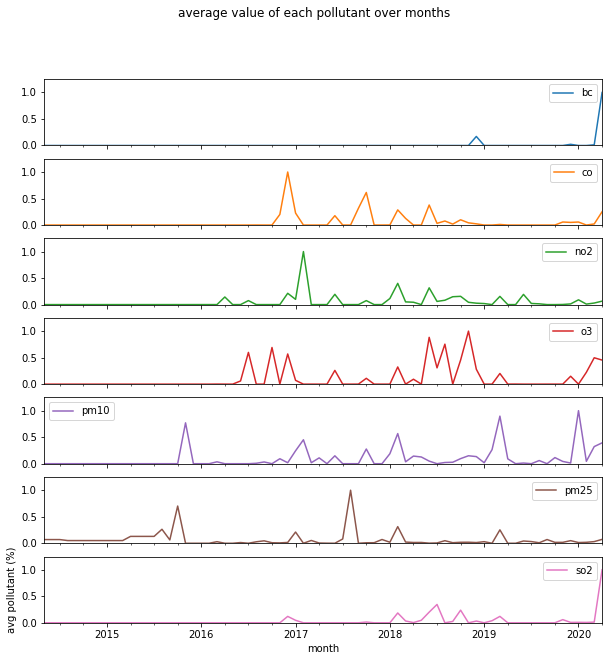

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')

# [1] Membuat pivot table yang menunjukkan waktu di baris nya dan masing-masing value dari pollutant nya dalam kolom
gaq_viz = gaq[['pollutant', 'value']].reset_index().set_index(['timestamp','pollutant'])
gaq_viz = gaq_viz.pivot_table(index='timestamp', columns='pollutant', aggfunc='mean').fillna(0)
gaq_viz.columns = gaq_viz.columns.droplevel(0)
print('Data (5 teratas):\n', gaq_viz.head())

# [2] Membuat fungsi yang memberikan default value 0 ketika value nya di bawah 0 dan apply ke setiap elemen dari dataset tersebut, kemudian menampilkannya sebagai chart
def default_val(val):
 if val < 0:
   return 0
 else:
   return val
line1 = gaq_viz.resample('M').mean().ffill().applymap(lambda x: default_val(x)).apply(lambda x: x/x.max()) # default value if value < 0 then 0, kemudian menghasilkan % value = value/max(value)
line1.plot(
   title = 'average value of each pollutant over months',
   figsize = (10,10), #ukuran canvas 10px x 10px
   ylim = (0,1.25), #memberikan batas tampilan y-axis hanya 0 sampai 125%
   subplots = True #memecah plot menjadi beberapa bagian sesuai dengan jumlah kolom
)

plt.ylabel('avg pollutant (%)')
plt.xlabel('month')
plt.show()

**Quiz**

*Untuk dataset global_air_quality.csv yang telah di-load ke dalam data frame gaq.*

*Andra memintaku untuk menentukan trend dari rata-rata tahunan pollutant SO2 (kolom pollutant) yang dihitung berdasarkan value SO2 (kolom value).*

*Apa yang harus aku lakukan untuk membantu Andra ini?*

**Jawaban** : *gaq.loc[gaq['pollutant'] == 'so2', 'value'].resample('A').mean().plot()*

**End of Module**